In [15]:
import sys
sys.path.insert(0, '../../python_dms/lib/')
from tools_dms import *
from dms import *
from PIL import Image
import scipy.io as sio
import matplotlib.pyplot as plt
import scipy.io
import time 
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [16]:
import os
def SegtoCon_DMS(seg):
    rows,cols = np.shape(seg)
    cont= np.zeros_like(seg)
    y=  np.zeros((rows,cols,2))
    y[:, :, 0] = np.concatenate((seg[:, 1:] - seg[:, 0:-1], np.zeros((rows, 1))),axis=1) / 2.
    y[:, :, 1] = np.concatenate((seg[1:, :] - seg[0:-1, :], np.zeros((1, cols))),axis=0) / 2.
    
    for i in range(rows):
        for j in range(cols):
            if np.abs(y[i,j,0]) > 0 or np.abs(y[i,j,1])>0:
                cont[i,j]=1
#                 im[i,j,:]=0
    return cont

def SegtoCon_DMS(seg):
    rows,cols = np.shape(seg)
    cont= np.zeros_like(seg)
    y=  np.zeros((rows,cols,2))
    y[:, :, 0] = np.concatenate((seg[:, 1:] - seg[:, 0:-1], np.zeros((rows, 1))),axis=1) / 2.
    y[:, :, 1] = np.concatenate((seg[1:, :] - seg[0:-1, :], np.zeros((1, cols))),axis=0) / 2.
    
    for i in range(rows):
        for j in range(cols):
            if np.abs(y[i,j,0]) > 0 or np.abs(y[i,j,1])>0:
                cont[i,j]=1
#                 im[i,j,:]=0
    return cont

Objective: Jaccard


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:35<00:00,  2.79it/s]


Round:  0   0.06950583757854467 beta:   316.22776601683796 , lam:   0.03162277660168379
2.5


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:36<00:00,  2.74it/s]


Round:  1   0.13809935739001483 beta:   5623.413251903491 , lam:   5.623413251903491
1.25


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:36<00:00,  2.72it/s]


Round:  2   0.13979289940828402 beta:   23713.737056616552 , lam:   20.53525026457146
0.625


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:38<00:00,  2.58it/s]


Round:  3   0.14047477744807121 beta:   11547.819846894581 , lam:   10.746078283213174
0.3125


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:36<00:00,  2.74it/s]


Round:  4   0.14077387868928654 beta:   16548.170999431815 , lam:   14.855080171727751
0.15625




Meaningful r (optimum is in the middle) 5
Total Computation time: 4703.054208278656


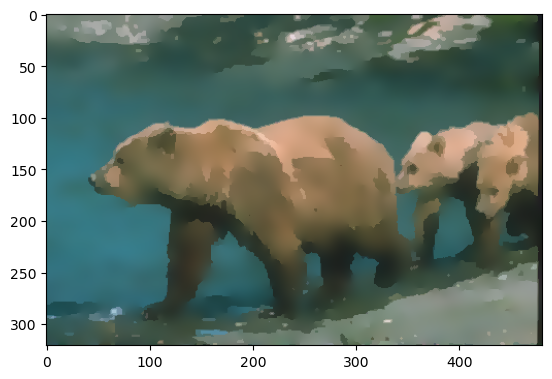

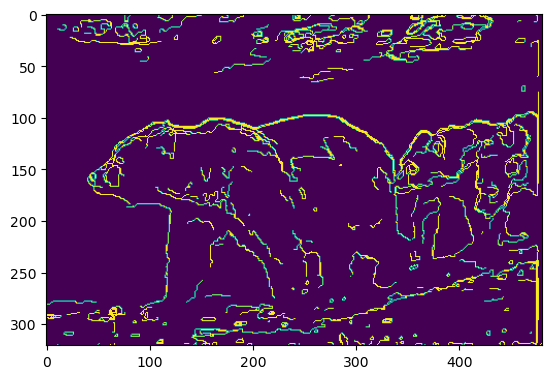

Objective: Jaccard


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:38<00:00,  2.58it/s]


Round:  0   0.11570609388667509 beta:   316.22776601683796 , lam:   0.03162277660168379
2.5


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:38<00:00,  2.59it/s]


Round:  1   0.11570609388667509 beta:   316.22776601683796 , lam:   0.03162277660168379
1.25


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:41<00:00,  2.43it/s]


Round:  2   0.12234454954256474 beta:   74.98942093324558 , lam:   0.008659643233600654
0.625


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:33<00:00,  3.02it/s]


Round:  3   0.12888934679579642 beta:   153.9926526059492 , lam:   0.03162277660168379
0.3125


 33%|██████████████████████████▋                                                      | 33/100 [00:12<00:24,  2.69it/s]

In [ ]:
valid_extensions = ['.jpg', '.jpeg', '.png', '.gif','.mat']  # Add more extensions if needed
np.random.seed(0)
# folder_path= "../../../BSDS500/data/images/train/"
folder_path= "../../../../Documents/dataset/BSDS500/data/images/train/"

idim=0
for filename in os.listdir(folder_path):
    if os.path.splitext(filename)[1].lower() in valid_extensions:
        image_path = os.path.join(folder_path, filename)
        image_name= os.path.splitext(filename)[0]
        x = np.array(Image.open(image_path))/255.
        r,l,_ = np.shape(x)
        delta= 0.05
        z = x+ delta*np.random.normal(0,1,x.shape)
            
        mat_file_path = "../../../../Documents/dataset/BSDS500/data/groundTruth/train/"+image_name+".mat"
        mat_file = scipy.io.loadmat(mat_file_path)

        cont= np.zeros((r,l))
        for v in range(0,4):
            seg = mat_file['groundTruth'][0,v][0,0][0]
            cont += SegtoCon_DMS(seg)
        cont = np.where(cont > 0, 1, 0)
        
#         plt.figure()
#         plt.imshow(x)
#         plt.show()
#         plt.figure()
#         plt.imshow(z)
#         plt.show()
#         plt.figure()
#         plt.imshow(cont,'gray')
#         plt.show()
#         plt.figure()
#         plt.hist(cont.flatten())
#         plt.show()
        tab_Jaccard_out,tab_coord_max_Jaccard_out,tab_Jaccard_max,out1,out0= golden_section_map(z,x,cont,bmax=5,bmin=-5,lmax=3,lmin=-6,scale_type='10',
                       grid_size=5,max_round=5,objective='Jaccard',maxiter=100,stop_crit=1e-4,
                                method='SLPAM',norm_type='l1',eps=2.,eps_AT_min=0.02,A=np.ones((r,l)))
        scipy.io.savemat("../../../../Documents/dataset/BSDS500/data/param_dist_Jaccard/train/"+image_name+".mat",dict(tab_Jaccard_out=tab_Jaccard_out,tab_coord_max_Jaccard_out=tab_coord_max_Jaccard_out,tab_Jaccard_max=tab_Jaccard_max,out1=out1,out0=out0))
        cont_thres = np.ones_like(out0)*(out0>0.5)
#         
        cont_thres = np.clip(cont_thres[:,:,0]+cont_thres[:,:,1],0,1)
        plt.figure()
        plt.imshow(out1)
        plt.show()
        plt.figure()
        plt.imshow(cont_thres)
        plt.show()
        idim += 1
#         if idim ==1:
#             break
#             



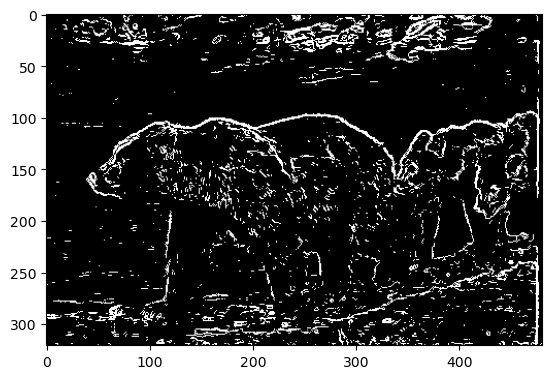

In [41]:
cont_thres = np.ones_like(out0)*(out0>0.2)
# cont_thres = out0

cont_thres = np.clip(cont_thres[:,:,0]+cont_thres[:,:,1],0,1)
plt.figure()
plt.imshow(cont_thres,cmap='gray')
plt.show()

In [38]:
cont_thres

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.50171601],
       [0.        , 0.        , 0.        , ..., 0.        , 0.40681355,
        0.        ]])

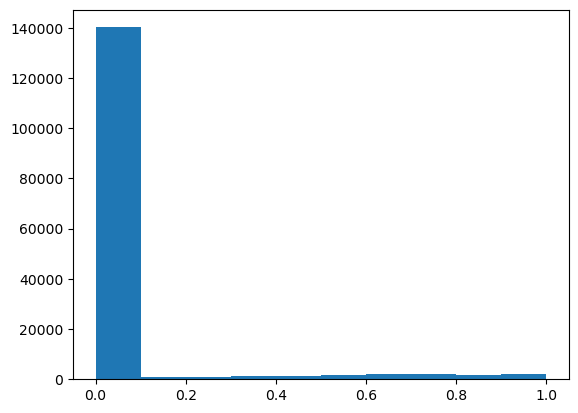

In [39]:
plt.figure()
plt.hist(cont_thres.flatten())
plt.show()